PROJECT TO SHOW DATA FROM MY THINKSPEAK GRAPHS

In [54]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
r = f"https://api.thingspeak.com/channels/2338840/feeds.json?results=300000"
        
response = requests.get(r)
data = response.json()

df = pd.DataFrame(data['feeds'])



FILTER DATA WITHOUTH VALUES

In [60]:
def eliminar_filas_cero(df, field1, field2):
    return df[(df[field1].notna()) & (df[field2].notna())]
df = eliminar_filas_cero(df, "field1", "field2")
df = df.loc[df['field1'] != 0]
df = df.loc[df['field2'] != 0]

# Ejemplo de uso
df["field1"] = pd.to_numeric(df["field1"], errors='coerce')
df["field2"] = pd.to_numeric(df["field2"], errors='coerce')
print(df.to_string())


                created_at  entry_id  field1  field2
0     2025-02-05T19:01:26Z    425828    21.2   30.12
1     2025-02-05T19:02:28Z    425829    21.2   30.12
2     2025-02-05T19:03:29Z    425830    21.2   30.12
3     2025-02-05T19:04:30Z    425831    21.2   25.93
4     2025-02-05T19:05:32Z    425832    21.1   25.93
5     2025-02-05T19:06:33Z    425833    21.2   25.93
6     2025-02-05T19:07:35Z    425834    21.1   25.93
7     2025-02-05T19:08:36Z    425835    21.1   25.93
8     2025-02-05T19:09:38Z    425836    21.2   25.93
9     2025-02-05T19:10:39Z    425837    21.2   25.93
10    2025-02-05T19:11:40Z    425838    21.2   25.93
11    2025-02-05T19:12:42Z    425839    21.2   25.93
12    2025-02-05T19:13:43Z    425840    21.2   25.93
13    2025-02-05T19:14:44Z    425841    21.2   25.93
14    2025-02-05T19:15:46Z    425842    21.2   25.93
15    2025-02-05T19:16:47Z    425843    21.1   25.93
16    2025-02-05T19:17:48Z    425844    21.2   25.93
17    2025-02-05T19:18:50Z    425845    21.2  

Compare temperatures

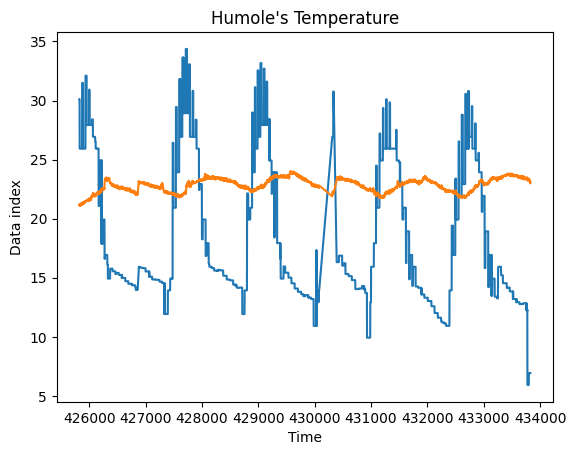

In [61]:

pedro = df["field2"].mean()
juan = df["field1"].mean()

plt.plot(df["entry_id"], df["field2"])
plt.plot(df["entry_id"], df["field1"])
plt.title("Humole's Temperature")
plt.xlabel("Time")
plt.ylabel("Data index")
plt.show()

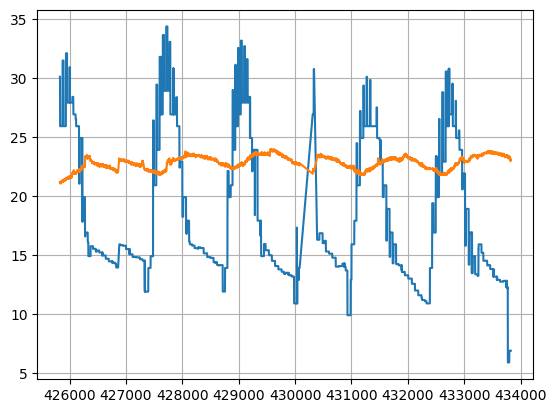

In [63]:
linea1 = np.array(df["field2"])
linea2 =np.array(df["field1"])
plt.plot(df["entry_id"], linea1, label = "Humole's Temperature")
plt.plot(df["entry_id"], linea2, label = "Los Mochis Temperature")
plt.grid()
plt.show()

(array([  5.,  31.,  46.,  26.,  43.,  32.,  29.,  84., 289., 188., 253.,
        312., 401., 252., 361., 369., 440., 434., 309., 393., 628., 516.,
        485., 611., 438., 348., 218.,  70.,  64.,  18.]),
 array([21.1       , 21.19666667, 21.29333333, 21.39      , 21.48666667,
        21.58333333, 21.68      , 21.77666667, 21.87333333, 21.97      ,
        22.06666667, 22.16333333, 22.26      , 22.35666667, 22.45333333,
        22.55      , 22.64666667, 22.74333333, 22.84      , 22.93666667,
        23.03333333, 23.13      , 23.22666667, 23.32333333, 23.42      ,
        23.51666667, 23.61333333, 23.71      , 23.80666667, 23.90333333,
        24.        ]),
 <BarContainer object of 30 artists>)

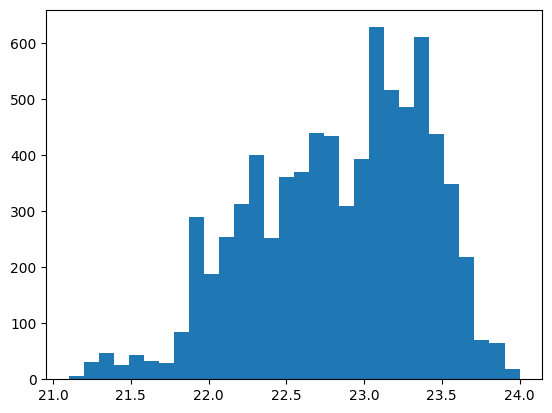

In [59]:
pepe = np.array(df["field1"])
plt.hist(pepe, bins=30)
